# Building a recommendation system from scratch


### Good Book on recommender systems: https://epdf.pub/recommender-systems-an-introduction.html

* The rapid growth of data collection has led to a new era of information. 


* Data is being used to create more efficient systems and this is where Recommendation Systems come into play. 


* Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.


* They are used to predict the rating or preference that a user would give to an item. 


* Almost every major tech company has applied them in some form or the other: 

    * Amazon uses it to suggest products to customers
    
    * YouTube uses it to decide which video to play next on autoplay
    
    * Facebook uses it to recommend pages to like and people to follow. 


* Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

<img src='img/reco1.JPG'>

* ****Dataset:****
    * datasets/tmdb_5000_credits.csv
    * datasets/tmdb_5000_movies.csv


## There are mainly 3 types of recommendation system: 

1. **Demographic Filtering**
    
    a. This offers generalized recommendations to every user.
    
    b. Since its generalized, it will recommend same movies to all users.
    
    c. Since each user is different, this approach is a tad too simple.


2. Content Based Filtering
<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/06/Screenshot-from-2018-06-21-10-57-38.png'>

        a. Suggests similar items 
        
        b. This will use different item metadata to draw similarities between items.
        
        c. General idea behind this type of reco engine is that if a person likes an item A then he will also like item b

3. Collaborative Filtering

    a. This system matches users/persons with similar interests and provides recommendations.
 
    b. These filters will not require metadata to provide recommendations
    
<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/05/0o0zVW2O6Rv-LI5Mu1.png'>
 
### Let's explore all of these:

In [1]:
import pandas as pd
import numpy as np


df1 = pd.read_csv('datasets/tmdb_5000_credits.csv')
df2 = pd.read_csv('datasets/tmdb_5000_movies.csv')

In [2]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

# The first dataset contains the following features -

* movie_id - A unique identifier for each movie.
    
    
* cast - The name of lead and supporting actors.
    
    
* crew - The name of Director, Editor, Composer, Writer etc.


# The second dataset has the following features - 

* budget - The budget in which the movie was made.


* genre - The genre of the movie, Action, Comedy ,Thriller etc.


* homepage - A link to the homepage of the movie.


* id - This is infact the movie_id as in the first dataset.


* keywords - The keywords or tags related to the movie.


* original_language - The language in which the movie was made.


* original_title - The title of the movie before translation or adaptation.


* overview - A brief description of the movie.


* popularity - A numeric quantity specifying the movie popularity.


* production_companies - The production house of the movie.


* production_countries - The country in which it was produced.


* release_date - The date on which it was released.


* revenue - The worldwide revenue generated by the movie.


* runtime - The running time of the movie in minutes.


* status - "Released" or "Rumored".


* tagline - Movie's tagline.


* title - Title of the movie.


* vote_average - average ratings the movie recieved.


* vote_count - the count of votes recieved.


# Let's join the two dataset on the 'id' column

In [6]:
df1.columns = ['id', 'title', 'cast', 'crew']

df2 = df2.merge(df1,on='id')

df2.head(2)

In [7]:
df2.tail(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...",...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


## Demographic Filtering

In [8]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

* We need a metric to score the movie.


* Calculate score of every movie.


* Sort the scores and recommend best rated movie to users


* We'll use IMDB weighted average score to score the movies:

<img src='img/reco2.jpg'>

### Discussion on Formula : 
http://answers.google.com/answers/threadview/id/507508.html

* R - Vote average of the movie


* C - mean vote


* v - number of votes


* m - minimum number of votes required to be listed in the chart

In [9]:
C = df2['vote_average'].mean()

C

6.092171559442011

### So mean rating of all the movies on a scale of 10 is approx. 6

**Next step is to determine the appropriate value of m.**


**We'll use 90th percentile**

In [10]:
m = df2['vote_count'].quantile(0.9)

m

1838.4000000000015

## Now let's filter out the movie

In [11]:
df = df2.copy().loc[df2['vote_count']>m]
df.shape

(481, 23)

In [12]:
df2.shape

(4803, 23)

### Create a function for weighted average
<img src='img/reco2.jpg'>

In [13]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v)*C)

In [14]:
df['score'] = df.apply(weighted_rating,axis=1)

In [15]:
df[['title_x','score']].head()

,title_x,score
0,Avatar,7.050669
1,Pirates of the Caribbean: At World's End,6.665696
2,Spectre,6.239396
3,The Dark Knight Rises,7.346721
4,John Carter,6.096368


In [16]:
df = df.sort_values('score',ascending=False)

df['title_x'].head(10)

1881                         The Shawshank Redemption
662                                        Fight Club
65                                    The Dark Knight
3232                                     Pulp Fiction
96                                          Inception
3337                                    The Godfather
95                                       Interstellar
809                                      Forrest Gump
329     The Lord of the Rings: The Return of the King
1990                          The Empire Strikes Back
Name: title_x, dtype: object

In [17]:
pop = df.sort_values('popularity',ascending=False)

import matplotlib.pyplot as plt
%matplotlib inline


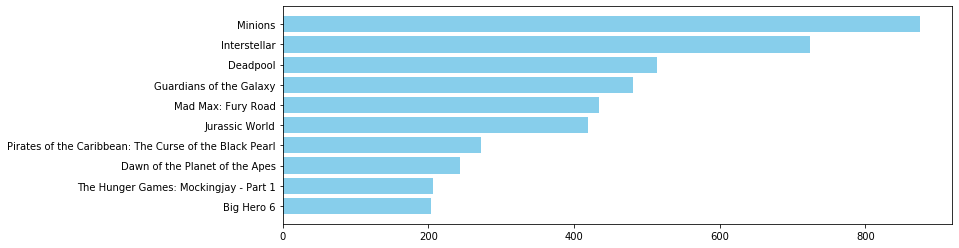

In [18]:
plt.figure(figsize=(12,4))

plt.barh(pop['title_x'].head(10),pop['popularity'].head(10),align='center',color='skyblue')

plt.gca().invert_yaxis()



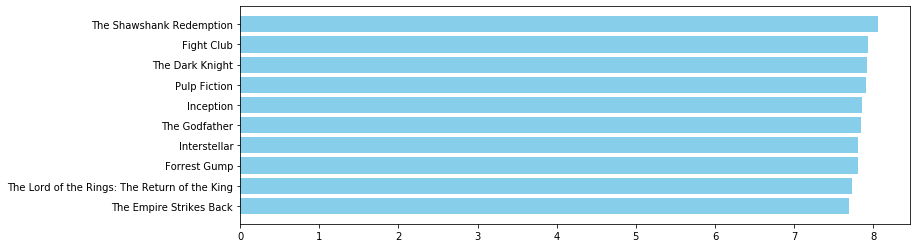

In [19]:
pop = df.sort_values('score',ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['title_x'].head(10),pop['score'].head(10),align='center',color='skyblue')

plt.gca().invert_yaxis()




##### General Recommendation system

### Need more refined Recommendation System

## Content based Filtering

##### In content based filtering we'll look at movie metadata to find its similarity to other movies.

<img src='img/reco3.JPG'>

In [20]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

### Plot description based recommender

* We'll compute a pairwise similarity scores for all movies based on plot descriptions.


* Plot description is given in overview feature of our dataset

## Text Pre-processing

* In order to convert the text into mathematical representations, we'll use another vectorizer called **TF-IDF vectorizer**


* **TF = Term Frequency** - relative frequency of a word in a document. (term instances / total instances)


* **IDF = Inverse Document Frequency** - relative count of the documents containing the term
    * log (number of documents / documents with term )


* TF X IDF



In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english')

### Yesterday's typhoon Amphan has brought down all the network in Kolkata.

In [22]:
df2['overview'] = df2['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

### Cosine Similarity

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [24]:
df_sim = pd.DataFrame(cosine_sim)
df_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.000000,0.000000,0.0,0.024995,0.000000,0.030353,0.000000,0.037581,0.000000,0.000000,...,0.000000,0.0,0.029175,0.042176,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.0,0.000000,0.033369,0.000000,0.000000,0.022676,0.000000,0.000000,...,0.000000,0.0,0.006895,0.000000,0.000000,0.0,0.0,0.021605,0.000000,0.000000
2,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.030949,0.024830,0.000000,...,0.027695,0.0,0.000000,0.000000,0.017768,0.0,0.0,0.014882,0.000000,0.000000
3,0.024995,0.000000,0.0,1.000000,0.010433,0.005145,0.012601,0.026954,0.020652,0.133740,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.033864,0.042752,0.022692
4,0.000000,0.033369,0.0,0.010433,1.000000,0.000000,0.009339,0.037407,0.000000,0.017148,...,0.012730,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.006126,0.000000,0.000000


### We're going to define a function that takes in a movie title and gives out 10 most similar movies as output.

In [25]:
indices = pd.Series(df2.index,index=df2['title_x']).drop_duplicates()

indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [26]:
def get_recommendations(title,cosine_sim=cosine_sim):
    
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df2['title_x'].iloc[movie_indices]

In [27]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title_x, dtype: object

In [28]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object

### Genres, and Keyword based similarity

We will now build recommender with following metadata:

* 3 top actors


* Director


* related genres and plot keywords

In [29]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239


In [30]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [31]:
from ast import literal_eval

features = ['cast','crew','keywords','genres']

1-10 id
10-50 name
seperator csv, tsv
xml
json
protobuf

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [33]:
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [35]:
df2[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [36]:
df2[features].to_csv('feature_cbf.csv')

* 3 top actors

* related genres and plot keywords

In [37]:
# Director

def extract_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [38]:
# Top 3 actors

def get_top_3(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        
        # Check if there are more than 3 elements then we'll return only first 3 elements
        if len(names)>3:
            names = names[:3]
        #print(names)
        return names
    return []

In [39]:
df2['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [40]:
df2['director'] = df2['crew'].apply(extract_director)

In [41]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton


In [42]:
features = ['cast', 'keywords', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(get_top_3)

In [43]:
df2[['title_x','cast','keywords','genres','director']].head(2)

,title_x,cast,keywords,genres,director
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war]","[Action, Adventure, Fantasy]",James Cameron
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]",Gore Verbinski


### Strip whitespaces between words and join the list by removing ,

In [44]:
def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        if isinstance(x,str):                     # Director
            return str.lower(x.replace(" ",""))
        else:
            return ""

In [45]:
features = ['director','cast','keywords','genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [46]:
df2[['title_x','cast','keywords','genres','director']].head(2)

,title_x,cast,keywords,genres,director
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[cultureclash, future, spacewar]","[action, adventure, fantasy]",jamescameron
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]",goreverbinski


In [47]:
def join_keywords(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [48]:
df2['joined_kw'] = df2.apply(join_keywords,axis=1)

In [52]:
df2['joined_kw'][0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'

#### Vectorizing will be done using count vectorizer instead of TF-IDF vectorizer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

cm = cv.fit_transform(df2['joined_kw'])

In [55]:
cm.shape

(4803, 11520)

In [56]:
# Computing a similarity matrix

from sklearn.metrics.pairwise import cosine_similarity #, linear_kernel

cosine_sim2 = cosine_similarity(cm,cm)

In [57]:
df_cs2 = pd.DataFrame(cosine_sim2)
df_cs2.head()

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.0,0.3,0.2,0.1,0.2,0.3,0.0,0.2,0.2,0.3,...,0.000000,0.0,0.000000,0.000000,0.0,0.095346,0.0,0.0,0.0,0.0
1,0.3,1.0,0.2,0.1,0.2,0.3,0.0,0.2,0.2,0.3,...,0.000000,0.0,0.000000,0.000000,0.0,0.095346,0.0,0.0,0.0,0.0
2,0.2,0.2,1.0,0.2,0.3,0.2,0.0,0.2,0.1,0.2,...,0.000000,0.0,0.000000,0.000000,0.0,0.190693,0.0,0.0,0.0,0.0
3,0.1,0.1,0.2,1.0,0.1,0.1,0.0,0.1,0.0,0.2,...,0.111803,0.0,0.105409,0.091287,0.0,0.190693,0.0,0.1,0.0,0.0
4,0.2,0.2,0.3,0.1,1.0,0.2,0.0,0.3,0.1,0.2,...,0.000000,0.0,0.000000,0.091287,0.0,0.095346,0.0,0.0,0.0,0.0


In [59]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index = df2['title_x'])
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [61]:
get_recommendations('Avatar',cosine_sim2)

206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title_x, dtype: object

In [62]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title_x, dtype: object

In [63]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object

In [64]:
get_recommendations('The Dark Knight Rises',cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title_x, dtype: object

In [65]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

In [66]:
get_recommendations('The Avengers',cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title_x, dtype: object

## Homework : Improve this reco system by adding more metadata like production house, adding weight to a feature by mentioning it a couple of times in the joined_kw column of df2.

## Let me know your results tomorrow.

### Collaborative Filtering

1. It is not capturing tastes of uses.


2. It will not make recommendations across genre.


##### Personna based recommendations or targeted recommendations are absent.

## User based collaborative filtering

Recommend products to a user that a similar user has liked.

<img src='img/reco5.JPG'>

<img src='img/reco6.JPG'>

<img src='img/reco7.JPG'>


#### Issue

* User preferences change over time.


* The similarity matrix is pre-computed based on user preferences. So it can lead to bad performance.


## Item based collaborative filtering

Instead of measuring similarity between users, we'll measure the similarity between the items that the **targeted user** rated.


<img src='img/reco8.JPG'>

* **Scalability** - One of the issues to deal here is to give real-time recommendations. So the algo has to be very fast as compared to the User based CF which is pre-computed.


* As # of users and # of products increase, the time complexity will increase. For m users, and n products the time comlpexity will be O(m x n)


* It will lead to a sparse matrix


So optimization is a problem to deal with here.


## Solution : Singular value Decomposition

### Metric : RMSE (the lower the better)

#### Library : Surprise

!conda install -c conda-forge scikit-surprise

In [69]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()

df3 = pd.read_csv('datasets/ratings_small.csv')

In [71]:
df3.head()
df3.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [74]:
data = Dataset.load_from_df(df3[['userId', 'movieId', 'rating']],reader)

algo = SVD()

cross_validate(algo,data,measures=['RMSE','MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9013  0.8869  0.8975  0.9003  0.8952  0.8962  0.0051  
MAE (testset)     0.6920  0.6835  0.6935  0.6933  0.6871  0.6899  0.0039  
Fit time          4.86    4.94    5.06    5.08    4.98    4.98    0.08    
Test time         0.14    0.13    0.13    0.13    0.13    0.13    0.00    


{'test_rmse': array([0.90129399, 0.88691303, 0.89752221, 0.90028293, 0.8952319 ]),
 'test_mae': array([0.69200985, 0.68347597, 0.69352066, 0.69329261, 0.68714219]),
 'fit_time': (4.862430810928345,
  4.939812898635864,
  5.055010080337524,
  5.080079793930054,
  4.980756998062134),
 'test_time': (0.139509916305542,
  0.12765812873840332,
  0.12981390953063965,
  0.1277451515197754,
  0.12952280044555664)}

In [76]:
df3[df3['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [77]:
algo.predict(1,302,verbose=True)

user: 1          item: 302        r_ui = None   est = 2.93   {'was_impossible': False}


Prediction(uid=1, iid=302, r_ui=None, est=2.934315784895971, details={'was_impossible': False})

## Conclusion


1. 3 types of reco engines: Demographic, Content based, CF based


2. Demographic is pretty elementary. Content based can be improved by increasing the amount of metadata. CF  and Content based filtering can be combined to give rise to Hybrid approach.


3. This model is a starter pack for you. You can work on it to make it more and more better.